# To Explore Supervised Machine Learning

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Fetching the data from the URL

In [2]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)

## Checking out the data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


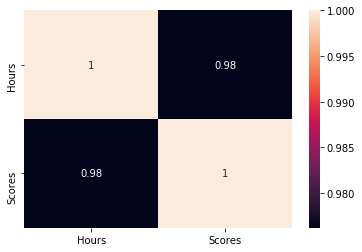

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the graph of hours v/s marks scored

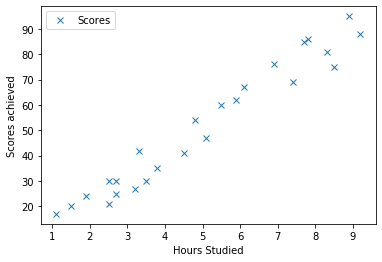

In [7]:
data.plot(x='Hours',y='Scores',style='x')
plt.xlabel('Hours Studied')
plt.ylabel('Scores achieved')

plt.show()

## dividing the data into x and y 

In [8]:
X = data['Hours'].values.reshape(-1,1) 
y = data['Scores'].values  


## splitting the data into test and train

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

## creating the training model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## visualizing training set

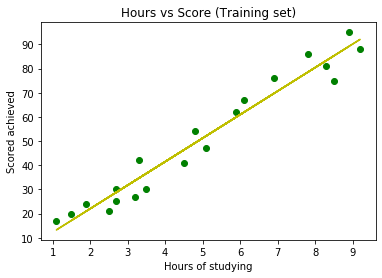

In [11]:
plt.scatter(X_train, y_train, color = 'g')
plt.plot(X_train, model.predict(X_train), color = 'y')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours of studying')
plt.ylabel('Scored achieved')
plt.show()

## visualizing test set

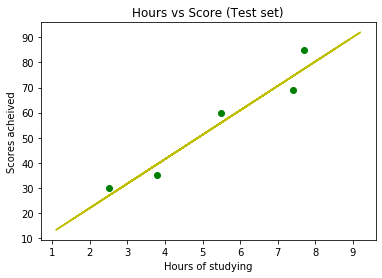

In [12]:
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X_train, model.predict(X_train), color = 'y')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours of studying')
plt.ylabel('Scores acheived')
plt.show()

In [13]:
X_test 
y_pred = model.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


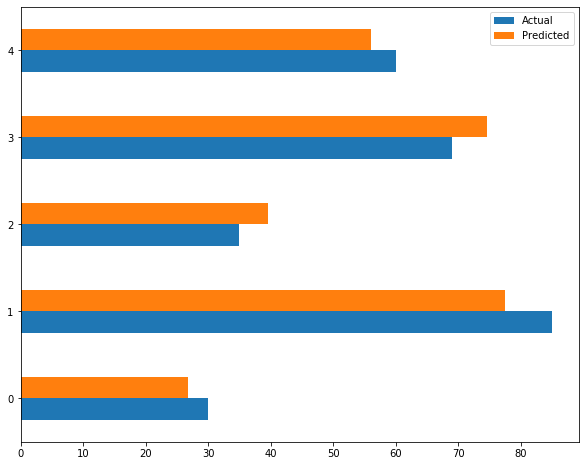

In [15]:
df.plot(kind='barh',figsize=(10,8))

## model evaluation

In [16]:
model.intercept_

2.512129298320083

In [17]:
model.coef_

array([9.73330705])

In [19]:
model.score(X_test,y_test) # accuracy of our model is 93%

0.9377551740781869



**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.937597792467705
MSE: 26.675642597052235
RMSE: 5.164846812544612


## Prediction based on input


In [20]:
print('Enter the no of hours')
hours=float(input())
new = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new.round(2)))

Enter the no of hours
9.25
No of Hours = 9.25
Predicted Score = [92.55]
